__Цель__

Методом линейной регрессии определить, какие факторы больше всего влияют на качество вина, и вторая цель - определить, влият ли содержание диоксидов серы на качество вина.

Импотрируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

Импортируем датасет о качестве вина

In [2]:
db=pd.read_csv('winequality-red.csv')

In [3]:
display(db.head(10))
display(db.info())
display(db.describe().round(2))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


Строим матрицу корреляций. Отображаем ее в графическом виде, для этого используем заданный цветовой стиль.

Значения коэффициентов корреляции округялем до 2-х знаков после запятой

In [4]:
corr = db.corr()
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
corr.style.background_gradient(cmap=cm).set_precision(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.26,0.67,0.11,0.094,-0.15,-0.11,0.67,-0.68,0.18,-0.062,0.12
volatile acidity,-0.26,1,-0.55,0.0019,0.061,-0.011,0.076,0.022,0.23,-0.26,-0.2,-0.39
citric acid,0.67,-0.55,1,0.14,0.2,-0.061,0.036,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.0019,0.14,1,0.056,0.19,0.2,0.36,-0.086,0.0055,0.042,0.014
chlorides,0.094,0.061,0.2,0.056,1,0.0056,0.047,0.2,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.011,-0.061,0.19,0.0056,1,0.67,-0.022,0.07,0.052,-0.069,-0.051
total sulfur dioxide,-0.11,0.076,0.036,0.2,0.047,0.67,1,0.071,-0.066,0.043,-0.21,-0.19
density,0.67,0.022,0.36,0.36,0.2,-0.022,0.071,1,-0.34,0.15,-0.5,-0.17
pH,-0.68,0.23,-0.54,-0.086,-0.27,0.07,-0.066,-0.34,1,-0.2,0.21,-0.058
sulphates,0.18,-0.26,0.31,0.0055,0.37,0.052,0.043,0.15,-0.2,1,0.094,0.25


Из таблицы видно, что линейные зависимости со значением корреляции 1 отсутсвуют. При этом имеются корреляции на значимом уровне. 


Для оценки корреляции величин, вычленим из таблицы корреляции значения, которые по модулю больше установленного предела (значимого уровня)

In [5]:
def CorrTable(corr,lim):
    _first_attr=[]
    _second_attr=[]
    _corr_coff=[]
    for i in corr.columns:
        for j in corr.columns:
            if np.abs(corr[i][j])>=lim and corr[i][j]!=1 and j not in _first_attr:
                _first_attr.append(i)
                _second_attr.append(j)
                _corr_coff.append(corr[i][j])
    corrDF=pd.DataFrame({'first attribute':_first_attr, 'second attribute':_second_attr, 'correlation':_corr_coff})
    return corrDF

In [6]:
CorrTable(corr,0.6)

,first attribute,second attribute,correlation
0,fixed acidity,citric acid,0.671703
1,fixed acidity,density,0.668047
2,fixed acidity,pH,-0.682978
3,free sulfur dioxide,total sulfur dioxide,0.667666


Из таблицы  видно, что при установленном пределе коэффициента корреляции 0.6, прямая зависимость наблюдается у трех пар, обратная у одной пары значений.

Значения коэффициентов корреляции ни в одном случае не превышают 0.7, поэтому предположим, что нет таких пар признаков, которые настолько сильно коррелировали бы между друг другом, чтобы можно было говорить об их линейной зависимости. Следовательно исключать какой-либо признак из модели линейной регресии не будем.   

Примечательно, что нет ни одного фактора, сильно коррелирующего со значением качества вина

__Оценим корреляцию признаков со значением "качество вина". Определим признаки с низкой корреляцией__

In [7]:
correlations = db.corr()['quality'].drop('quality')
correlations

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

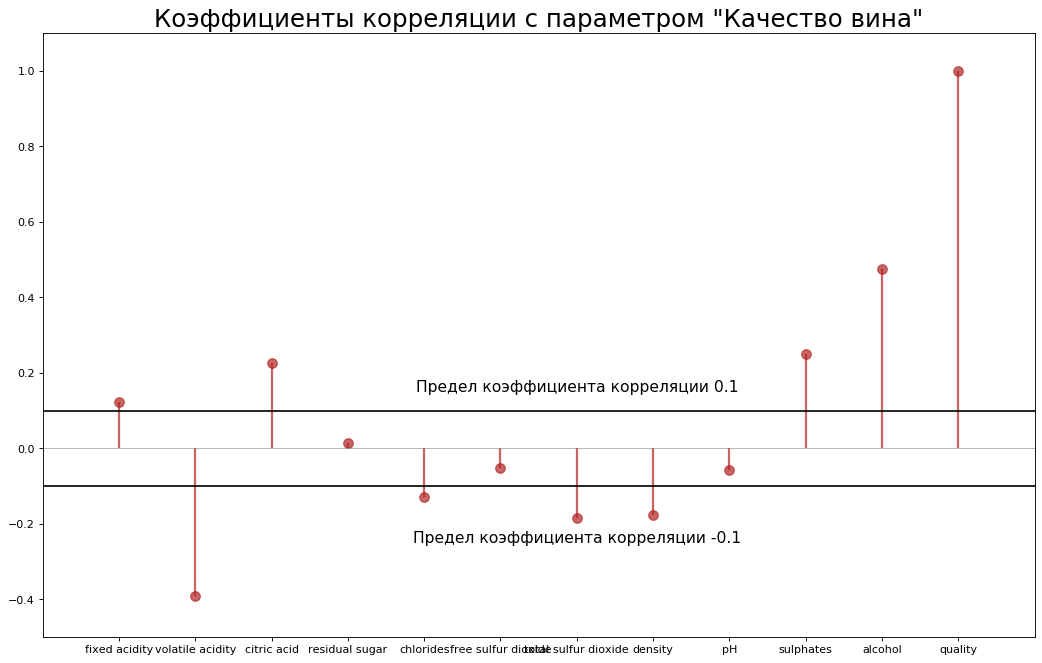

In [8]:
# Рисуем график
fig, ax = plt.subplots(figsize=(16,10), dpi=80)
ax.vlines(x=corr.index, ymin=0, ymax=corr['quality'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(corr.index, corr['quality'],s=75, color='firebrick', alpha=0.7)

#Задаем пределы по оси х и у
ax.set_ylim(-0.5, 1.1)
ax.set_xlim(-1, 12)

# Задаем название, задаем отображение вертикальных линий
ax.set_title('Коэффициенты корреляции с параметром "Качество вина"', fontdict={'size':22})
ax.set_xticks(corr.index)

#Отображаем горизонтальные линии коэффициента корреляции не больше 0.1
ax.hlines(0,-1, 12, 'grey', linewidth=0.5)
ax.hlines(0.1,-1, 12)
ax.hlines(-0.1,-1, 12)
ax.text(6,0.1+0.05,'Предел коэффициента корреляции 0.1', horizontalalignment='center', fontsize=14)
ax.text(6,-0.2-0.05,'Предел коэффициента корреляции -0.1', horizontalalignment='center', fontsize=14)


plt.show()

In [9]:
corr.loc[np.abs(corr['quality'])<0.1, 'quality']

residual sugar         0.013732
free sulfur dioxide   -0.050656
pH                    -0.057731
Name: quality, dtype: float64

Из графика видно, что три признака 'residual sugar', 'free sulfur dioxide', 'pH' имеют коэффициент коррелиции с признаком "качество вина" меньше 0.1. Данные признаки предлагаю не учитывать в модели линейной регрессии

In [10]:
linear_indexes=corr.loc[np.abs(corr['quality'])>=0.1].index.drop('quality')
linear_indexes

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'sulphates', 'alcohol'],
      dtype='object')

Разделим признаки на независимые и один зависимый - качество вина


In [11]:
dependent=['quality']
independent=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

Построим гистограмму распределения зависимого признака  'качество вина'

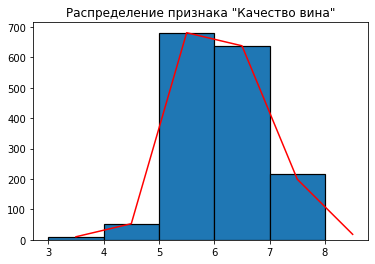

In [12]:
# Строим гистограмму распределения признака "качество вина"
plt.hist(db['quality'], bins=5, edgecolor='black', linewidth=1.2)
#Строим график распределения значений качества вина
x=np.linspace(3,8,6)
y=np.zeros(6)
for i in range(6):
    y[i]=db.loc[db['quality']==x[i],'quality'].count()
#задаем смещение значений х на 0,5 единиц вправо для корректного отображения на графике
x=x+0.5
plt.plot(x,y,'red')
plt.title('Распределение признака "Качество вина"')
plt.show()

Из графика распределения признака "Качество вина" видно, что данный признак дискретный и принимает значения от 3 до 8 с шагом 1. 
Однозначно сказать, что данный график имеет нормально распределение затруднительно. Поэтому необходимо проверить гипотезу о нормальности распределения признака "качество вина".

Построим гистограммы распределения для независимых признаков

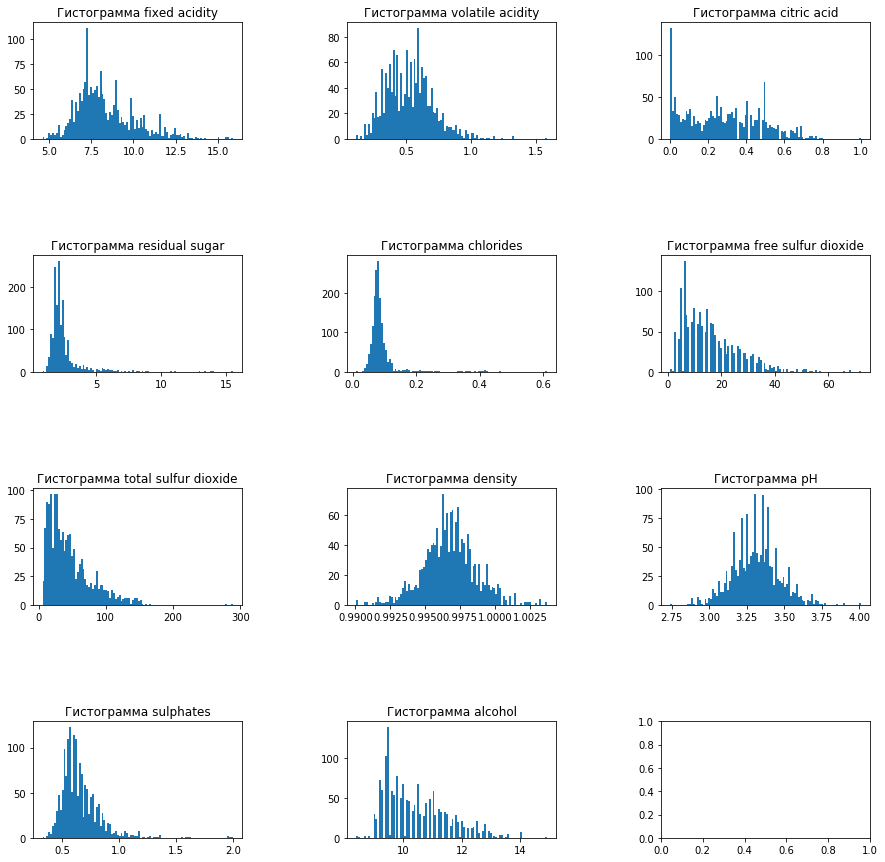

In [13]:
fig, ax = plt.subplots(nrows=4, ncols=3)
axf = ax.flatten()
for i,variable in enumerate(independent):
    axf[i].hist(db[variable],bins=100)
    axf[i].set_title(f'Гистограмма {variable}')
fig.set_size_inches(15,15)
plt.subplots_adjust(wspace=0.5,hspace=1)



Гистограммы распределения показывают приближенные к нормальным распределения, за исключением  citric acid,  где наблюдается значительное количество приближенных к нулю значений. 

Построим boxplot (ящик с усами) для независимых признаков

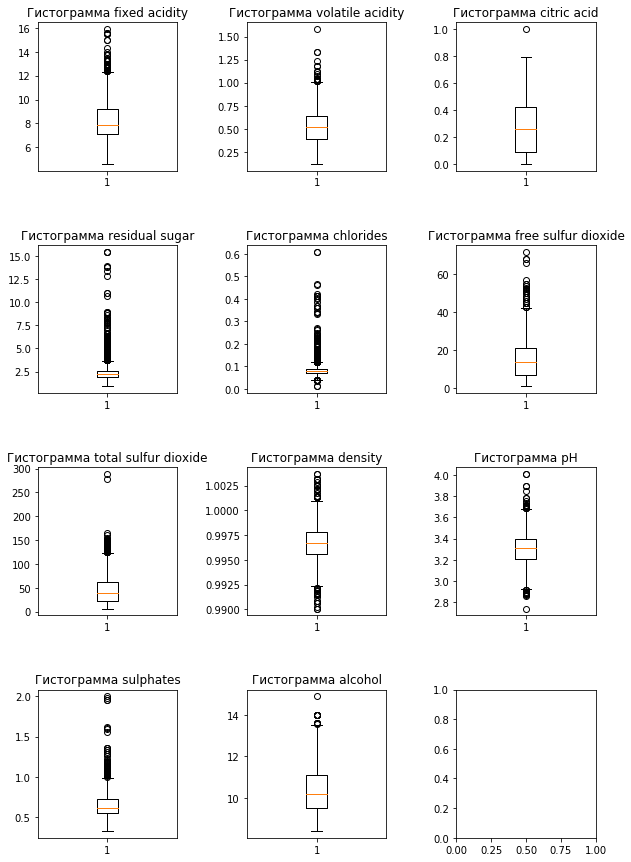

In [14]:
fig, ax = plt.subplots(nrows=4, ncols=3)
axf = ax.flatten()
for i,variable in enumerate(independent):
    axf[i].boxplot(db[variable])
    axf[i].set_title(f'Гистограмма {variable}')
fig.set_size_inches(10,15)
plt.subplots_adjust(wspace=0.5,hspace=0.5)

Из графиков boxplot видно, что для признаков  'residual sugar' и 'chlorides' интерквантильный размах IQR между первым и третьим квартилем находятся в узком диапазоне 1.9-2.6 и 0.07 - 0.09 соответственно, при этом наблюдается значительное количество "выбросов" - значений более +1.5 IQR, что связано с узким IQR.


Проверим отдельно выбросы признаков

In [15]:
columns=db.columns
name=[]
minus=[]
plus=[]
for i in columns:
    q1=np.percentile(db[i],25) #первый квартиль
    q3=np.percentile(db[i],75) #третий квартиль
    k=1.5 #коэффициент k
    name.append(i)
    minus.append(db.loc[db[i]<(q1-k*(q3-q1)), i].size)
    plus.append(db.loc[db[i]>(q3+k*(q3-q1)), i].size)
out_of_IQR=pd.DataFrame({'выбросы признака' : name, 'ниже -1.5IQR, шт.' : minus, 'выше +1.5IQR, шт.': plus})
out_of_IQR


,выбросы признака,"ниже -1.5IQR, шт.","выше +1.5IQR, шт."
0,fixed acidity,0,49
1,volatile acidity,0,19
2,citric acid,0,1
3,residual sugar,0,155
4,chlorides,9,103
5,free sulfur dioxide,0,30
6,total sulfur dioxide,0,55
7,density,21,24
8,pH,14,21
9,sulphates,0,59


Действительно для 'residual sugar' и 'chlorides' наибольшее количество выбросов 155 и 103 шт. соответственно

__Проверка на нормальность__

Проверим распределение зависимого признака "quality" на нормальность с помощью критерия Колмогорова-Смирнова 

Проверим распределение зависимого признака "quality" на нормальность с помощью критерия Колмогорова-Смирнова 

In [16]:
a = db['quality'].mean()
sigma = db['quality'].std(ddof=1)

n = db['quality'].shape[0]

a, sigma, n

(5.6360225140712945, 0.8075694397347023, 1599)

In [17]:
def emp(x):
    """Эмпирическая функция распределения"""
    samples=db['quality']
    return samples[samples<=x].size/samples.size

In [18]:
emp(3)

0.006253908692933083

In [19]:
# Теоритическая функция распределения
cdf=stats.norm(loc=a, scale=sigma).cdf

При этом обращаем внимание, что эмпирическая функция распределения строится на целочисленных данных (дискретных, со значениями 3,4,5,6,7,8), а теоретическая функция строится на непрерывных данных

In [20]:
cdf(3)

0.0005489777587522862

Строим график модуля разности между эмпирической и теоретической функциями распределения

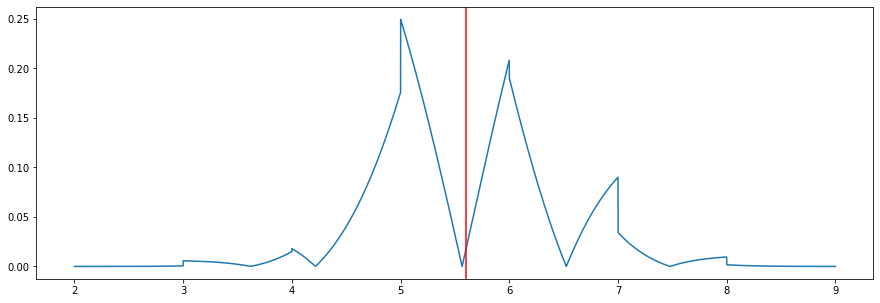

In [21]:
x=np.linspace(2,9,10000)
y=np.array([np.abs(emp(_)-cdf(_)) for _ in x])
plt.figure(figsize=(15,5))
plt.plot(x,y)
plt.axvline(5.6, color='r')

plt.show()

Максимум разницы приходится на значение "5". <br>
Определеним его в численных значениях 

In [22]:
x_max = 0
y_max = 0

for _x, _y in zip(x, y):
    if _y > y_max:
        x_max = _x
        y_max = _y
        
x_max, y_max

(5.000500050005, 0.24963730223453223)

Значение статистики Колмогорова-Смирнова равно 0.24763

Определеим критическое значение для уровня значимости 0.05

In [23]:
alpha = 0.05

stats.ksone.ppf(1 - alpha, n=n)

0.03050129387021332

Так как Значение статистики Колмогорова-Смирнова 0.247 больше критического значения  0.030, то гипотеза о нормальном распределении признака "качество вина" отвергается

Проверим нормальность распределения остальных признаков. Для этого создадим функцию для оценки нормальности распределения

In [24]:
def check_norm(data,column):
    """функция оценки нормальности распределения выборки"""
    a = data[column].mean()
    sigma = data[column].std(ddof=1)
    n = data[column].shape[0]
    
    def emp(x):
        """Эмпирическая функция распределения"""
        samples=data[column]
        return samples[samples<=x].size/samples.size
    
    """Теоритическая функция распределения"""
    cdf=stats.norm(loc=a, scale=sigma).cdf
    
    x=np.linspace(data[column].min(),data[column].max(),10000)
    y=np.array([np.abs(emp(_)-cdf(_)) for _ in x])
    
    x_max = 0
    y_max = 0
    for _x, _y in zip(x, y):
        if _y > y_max:
            x_max = _x
            y_max = _y
    kolmogorov=y_max
    alpha = 0.05
    critical=stats.ksone.ppf(1 - alpha, n=n)
    return [kolmogorov, critical, kolmogorov<=critical]


Выведем значения в таблице

In [25]:
columns=db.columns
kmg=[]
crt=[]
fltr=[]
for column in columns:
    mid=check_norm(db,column)
    kmg.append(mid[0])
    crt.append(mid[1])
    fltr.append(mid[2])
kolmogorov_db=pd.DataFrame({'Признак':columns, 'Статистика Колмогорова':kmg, 'Критическое значение':crt, 'Нормально ли распределение':fltr})
kolmogorov_db

,Признак,Статистика Колмогорова,Критическое значение,Нормально ли распределение
0,fixed acidity,0.110247,0.030501,False
1,volatile acidity,0.054403,0.030501,False
2,citric acid,0.083852,0.030501,False
3,residual sugar,0.260374,0.030501,False
4,chlorides,0.259585,0.030501,False
5,free sulfur dioxide,0.111095,0.030501,False
6,total sulfur dioxide,0.120732,0.030501,False
7,density,0.044548,0.030501,False
8,pH,0.040182,0.030501,False
9,sulphates,0.124728,0.030501,False


Таким образом в соответствии с критерием Колмогорова-Смирнова, ни одно из распределений признаков не является нормальным

__Модель линейной регрессии__

Находим коэффициенты линейной регрессии с помощью метода наименьших квадратов: <br>
1. Оставляем только признаки, которые мы определили как значимые

In [26]:
linear_indexes

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'sulphates', 'alcohol'],
      dtype='object')

In [27]:
x_values=db[linear_indexes]
y=db['quality']

2. добавляем столбец х0 с единичными значениями

In [28]:
x0=np.ones(db.shape[0]).reshape(-1,1)
X=np.hstack((x0,x_values))
X.shape,y.shape

((1599, 9), (1599,))

In [29]:
s=np.array(y)
s

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

Запишем матрицу $X^\top X$ и посчитаем её определитель.

In [30]:
XTX=X.T.dot(X)
np.linalg.det(XTX)

4.4079480344426747e+18

Определитель далек от нуля, поэтому вычисляем по аналитическому решению коэффициенты уравнения $y=b_0+b_1\cdot x_1+...+b_k\cdot x_k$   

In [31]:
XTX_inv=np.linalg.inv(XTX)
b=XTX_inv.dot(X.T).dot(y)
b

array([ 2.81645034e+01,  5.47344480e-02, -1.13697338e+00, -1.98204811e-01,
       -1.58356481e+00, -1.90657345e-03, -2.55826118e+01,  9.16346134e-01,
        2.68000946e-01])

Проверяем себя с помощью стандартной функции

In [32]:
cx=np.linalg.lstsq(X,y)
cx

(array([ 2.81645034e+01,  5.47344480e-02, -1.13697338e+00, -1.98204811e-01,
        -1.58356481e+00, -1.90657345e-03, -2.55826118e+01,  9.16346134e-01,
         2.68000946e-01]),
 array([671.40867716]),
 9,
 array([2.31779627e+03, 3.18321457e+02, 6.19733041e+01, 9.36384528e+00,
        6.74338735e+00, 4.16847462e+00, 3.66945296e+00, 1.56250256e+00,
        3.04257190e-02]))

Коэффициенты b совпадают. Следовательно расчет сделан верно. 

Проверим качество модели линейной регрессии используя коэффициент детерминации . Для этого рассчитаем предсказанное значение z, далее находим дисперсию значения z, и дисперсию реальных значений y. через них находим коэффициент детерминации

In [33]:
z=(b*X).sum(axis=1)
r2=z.var()/y.var()
r2

0.355533453585307

Коэффициент детерминации у нас довольно низкий - это говорит о том, что 64% переменной "y" не объясняется моделью.

Оценим качество модели используя среднюю ошибку апроксимации

In [34]:
A=np.abs((y-z)/y).mean()
A*100

9.241488556109102

Средняя ошибка апроксимации <=10% говорит о том, что теоретичесие значения z близки к тем, которые выдает модель линейной регрессии

Запишем модель линейной регрессии и оценки ее качества в виде функций

Выведем угловые коэффициенты 

In [35]:
linear_indexes=np.array(linear_indexes)
zero=np.array('null')
zero=np.append(zero,linear_indexes)
zero

array(['null', 'fixed acidity', 'volatile acidity', 'citric acid',
       'chlorides', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'], dtype=object)

In [36]:
b_coef=pd.DataFrame(b, zero, columns=['угловой коэффициент'])
b_coef

,угловой коэффициент
null,28.164503
fixed acidity,0.054734
volatile acidity,-1.136973
citric acid,-0.198205
chlorides,-1.583565
total sulfur dioxide,-0.001907
density,-25.582612
sulphates,0.916346
alcohol,0.268001


__Факторы, которые больше всего влияют на качество вина__ <br>
увеличение значения density на 1 уменьшает значение  quality на 25 единиц.<br>
__Tаким образом  самый значимый фактор это density__ 

__Влият ли содержание диоксидов серы на качество вина__<br>
Ранее значение  'free sulfur dioxide' было исключено из модели линейной регрессии в связи с низким коэффициентом корреляции. <br>
Угловой коэффициент total sulfur dioxide равен -0.001907 и является сравнительно низким. <br>
__Таким образом содержание диоксидов серы незначительно влияет на качество вина__